In [ ]:
import os
import clip
import torch
import matplotlib.pyplot as plt
from PIL import Image
import requests

def display_image(image):
  plt.imshow(image)
  plt.axis('off')  # Hide axis ticks
  plt.show()

In [ ]:
# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device)

100%|████████████████████████████████████████| 338M/338M [00:03<00:00, 111MiB/s]


In [ ]:
# Download the dataset
from torchvision.datasets import Food101
data = Food101(root=os.path.expanduser("~/.cache"), download=True, split = 'train')


In [ ]:
# Prepare the inputs
# image, class_id = data[1214]
# image_input = preprocess(image).unsqueeze(0).to(device)
# text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in data.classes]).to(device)


In [ ]:
def calcualate_features(image_url):
  image = Image.open(requests.get(image_url, stream=True).raw).convert("RGB")
  image_input = preprocess(image).unsqueeze(0).to(device)
  text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in data.classes]).to(device)

  # Calculate features
  with torch.no_grad():
      image_features = model.encode_image(image_input)
      text_features = model.encode_text(text_inputs)

  # Pick the top 5 most similar labels for the image
  image_features /= image_features.norm(dim=-1, keepdim=True)
  text_features /= text_features.norm(dim=-1, keepdim=True)
  similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
  #values, indices = similarity[0].topk(1)
  values, indices = similarity[0].topk(1)

  # Print the result
  print("\nResult:\n")
  for value, index in zip(values, indices):
    print(f"{data.classes[index]:>16s}: {100 * value.item():.2f}%")

  display_image(image)

  return data.classes[index]


Result:

           pizza: 95.70%


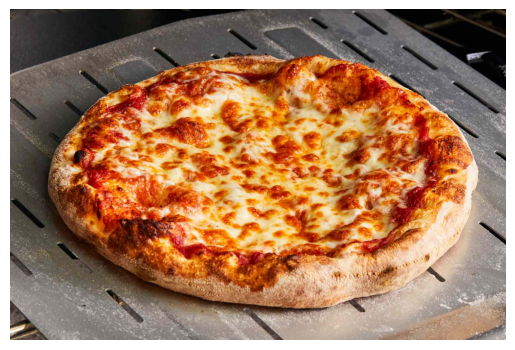

In [ ]:
#Pizza

image_url = "https://www.foodandwine.com/thmb/Wd4lBRZz3X_8qBr69UOu2m7I2iw=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/classic-cheese-pizza-FT-RECIPE0422-31a2c938fc2546c9a07b7011658cfd05.jpg"
calcualate_features(image_url)


Result:

       hamburger: 95.70%


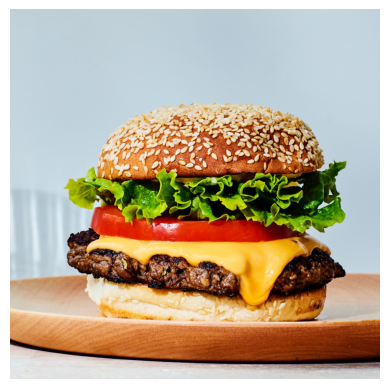

In [ ]:
#Burger

image_url = "https://assets.epicurious.com/photos/5c745a108918ee7ab68daf79/1:1/w_2240,c_limit/Smashburger-recipe-120219.jpg"
calcualate_features(image_url)


Result:

       cup_cakes: 95.70%


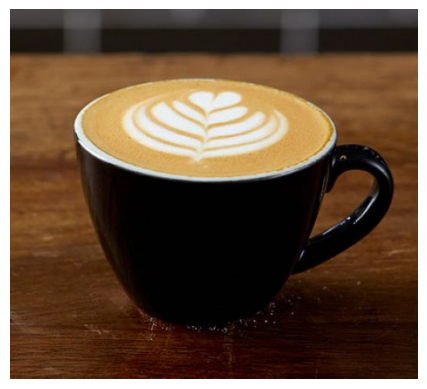

In [ ]:
#Coffee

image_url = "https://images.immediate.co.uk/production/volatile/sites/30/2020/08/flat-white-3402c4f.jpg"
calcualate_features(image_url)


Result:

   chicken_wings: 95.70%


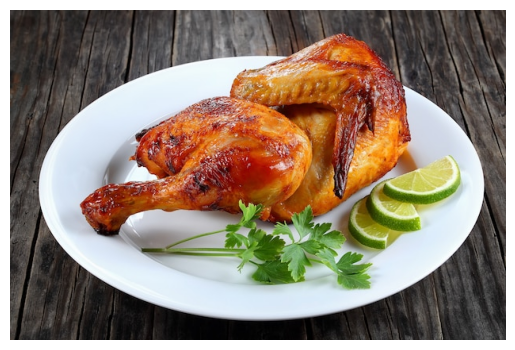

In [ ]:
#Chicken

image_url = "https://img.freepik.com/premium-photo/half-grilled-chicken-plate_268847-170.jpg"
calcualate_features(image_url)


Result:

   chicken_wings: 95.70%


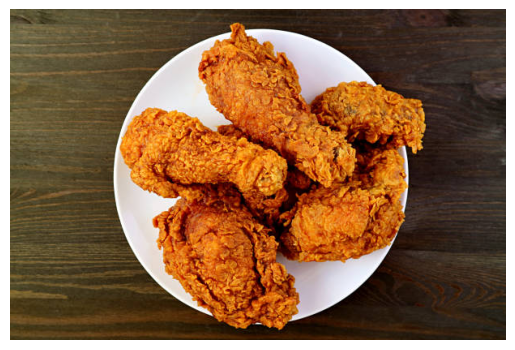

In [ ]:
#Chicken

image_url = "https://media.istockphoto.com/id/1297771706/photo/plate-of-delectable-golden-brown-crispy-fried-chickens-on-wooden-background.jpg?s=612x612&w=0&k=20&c=7Z5Shac-WD7uIAIeplTW_Rzb_wD0snwfFXyflVBO9eI="
calcualate_features(image_url)


Result:

      fried_rice: 95.70%


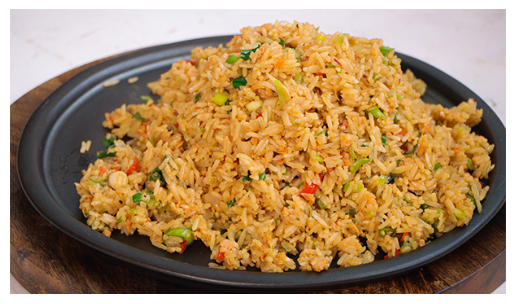

In [ ]:
#Fried rice

image_url = "https://www.vincenzosplate.com/wp-content/uploads/2021/07/610x350-Photo-6_829-How-to-Make-EGG-FRIED-RICE-Approved-by-Uncle-Roger-V1.jpg"
calcualate_features(image_url)


Result:

  grilled_salmon: 83.41%
      fried_rice: 4.35%
     greek_salad: 3.18%
        bibimbap: 1.29%


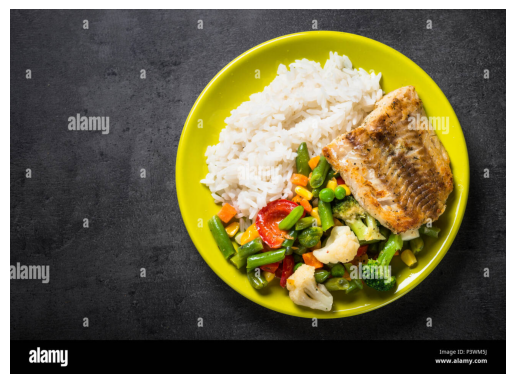

In [ ]:
image_url = "https://c8.alamy.com/comp/P3WM5J/fish-rise-and-vegetables-in-green-plate-on-black-background-healthy-food-menu-top-view-with-copy-space-P3WM5J.jpg"
calcualate_features(image_url)


Result:

    french_fries: 17.68%
macaroni_and_cheese: 15.25%
    french_toast: 14.04%
    spring_rolls: 9.99%


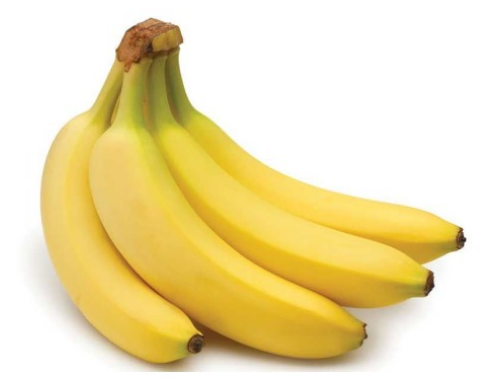

In [ ]:
image_url = "https://marketplacefresh.com.au/storage/media/23825/conversions/0002284_0-large_jpg.jpg"
calcualate_features(image_url)


Result:

       hamburger: 91.83%


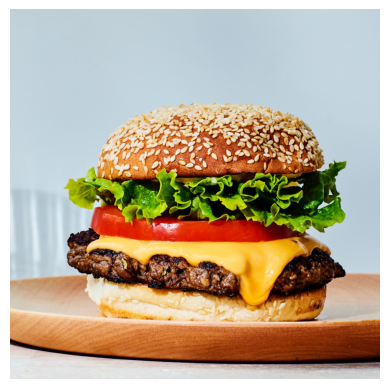

In [ ]:
image_url = "https://assets.epicurious.com/photos/5c745a108918ee7ab68daf79/1:1/w_2240,c_limit/Smashburger-recipe-120219.jpg"
res = calcualate_features(image_url)

In [ ]:
print(res)

hamburger


In [ ]:
pip install openai-clip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached ftfy-6.3.1-py3-none-any.whl.metadata (7.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.7 MB/s eta 0:00:00
  Created wheel for openai-clip: filename=openai_clip-1.0.1-py3-none-any.whl size=1368605 sha256=84dd38885f334bdd77b6b411b9900a2926e55eb3a21cb34cdd5249e4a914b570
  Stored in directory: /root/.cache/pip/wheels/0d/17/90/042948fd2e2a87f1dcf6db6d438cad015c49db0c53d1d9c7dc
Successfully built openai-clip
